# A Finite Element Examples: Frame 03

This example is based on the frame03 example distributed with FEM.edu

This is a single story-single bay frame system.

## Load needed components

We need to add the local code to the path or python won't find FEM.edu

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath(os.path.join("..")))

Now load the needed components of FEM.edu

In [2]:
from femedu.domain import *
from femedu.solver.NewtonRaphsonSolver import *
from femedu.elements.Frame2D import *
from femedu.materials.ElasticSection import *

## Build a model

In [3]:
# initialize a system model

N  = 8     # number of elements

B = 240.
H = 200.

E  = 29000.0
A = 20.0
I = 10.0

w = 1.0
load_at_nodes_only = False # set to True to apply equivalent nodal forces and moments

Ph = 0.00      # additional horizontal load per floor (imperfection)

# ========== setting global parameters ==============

target_load_level = 27
max_steps = 10
load_levels = np.linspace(0, target_load_level, max_steps)

# ========= build your structural model =============

model = System()
model.setSolver(NewtonRaphsonSolver())

x0 = 0.0
x1 = B / 3
x2 = 2 * B / 3
x3 = B

y0 = 0.0
y1 = H / 4
y2 = 2 * H / 4
y3 = 3 * H / 4
y4 = H

X10 = Node(x0, y0)
X11 = Node(x0, y1)

X20 = Node(x1, y0)
X21 = Node(x1, y1)

model.addNode(X10,X11)
model.addNode(X20,X21)

# columns

params = {'E': E, 'A': A, 'I': I}

C11 = Frame2D(X10, X11, ElasticSection(params))
C21 = Frame2D(X20, X21, ElasticSection(params))

model.addElement(C11,C21)

# floors

params = {'E': E, 'A': A, 'I': 8*I}

F11 = Frame2D(X11, X21, ElasticSection(params))

model.addElement(F11)

# fixities
X10.fixDOF('ux','uy','rz')   # fixed
X20.fixDOF('ux','uy','rz')   # fixed

# reference load
#Pcr = np.pi**2 * EI / L**2
model.resetLoad()            # size load vector and initialize
#model.addLoad(Xn, -Pcr, dof=0) # add a horizontal force (first dof only) ; remember C-style indexing: 0,1,...,(n-1)

if load_at_nodes_only:

    # floor loading as nodal loads ...

    Pe = w * B/3
    Mi = w * (B/3)**2 /12

    X11.addLoad([-Pe/2., -Mi],['uy','rz'])
    X21.addLoad([-Pe/2.,  Mi],['uy','rz'])

else:

    # floor loading as distributed loads ...

    F11.setDistLoad(-w)


# wind load ...

X11.addLoad([Ph],['ux'])   # horizontal load


# show model information
print(model)



System object
Node0({'ux': 0, 'uy': 1, 'rz': 2}, x=[0. 0.], u=None)
Node1({'ux': 0, 'uy': 1, 'rz': 2}, x=[ 0. 50.], u=None)
Node2({'ux': 0, 'uy': 1, 'rz': 2}, x=[80.  0.], u=None)
Node3({'ux': 0, 'uy': 1, 'rz': 2}, x=[80. 50.], u=None)
Frame2D(Node0({'ux': 0, 'uy': 1, 'rz': 2}, x=[0. 0.], u=None),Node1({'ux': 0, 'uy': 1, 'rz': 2}, x=[ 0. 50.], u=None),ElasticSection(Material)({'E': 29000.0, 'A': 20.0, 'I': 10.0, 'nu': 0.0, 'fy': 1e+30}))
Frame2D(Node2({'ux': 0, 'uy': 1, 'rz': 2}, x=[80.  0.], u=None),Node3({'ux': 0, 'uy': 1, 'rz': 2}, x=[80. 50.], u=None),ElasticSection(Material)({'E': 29000.0, 'A': 20.0, 'I': 10.0, 'nu': 0.0, 'fy': 1e+30}))
Frame2D(Node1({'ux': 0, 'uy': 1, 'rz': 2}, x=[ 0. 50.], u=None),Node3({'ux': 0, 'uy': 1, 'rz': 2}, x=[80. 50.], u=None),ElasticSection(Material)({'E': 29000.0, 'A': 20.0, 'I': 80.0, 'nu': 0.0, 'fy': 1e+30}))


## Path-Following and Stability Analysis

In [4]:
# initialize the analysis:
model.resetDisplacements()   # set U to all zeros
model.setLoadFactor(0.0)     # define a known equilibrium solution

model.startRecorder()        # not doing anything yet, but will do the data collection soon

detKt   = []
lambdas = []

# solve for all load_levels
for loadfactor in load_levels:

    # define node X2 as the controled node; downward direction is prescribed:
    model.setLoadFactor(loadfactor)
    model.solve(verbose=True)

    # stability check
    lambdas.append(model.loadfactor)
    detKt.append(model.solver.checkStability())

    # report results
    print('+')
    #model.report()

    print("\n=== next load level ===\n")
    

print(lambdas)
print(detKt)


norm of the out-of-balance force:   0.0000e+00
+

 ** Stability check: (smallest eigenvalue of Kt) = 25.362866066892394

+

=== next load level ===

norm of the out-of-balance force:   2.2691e+03
norm of the out-of-balance force:   2.7690e+01
norm of the out-of-balance force:   2.5832e-02
norm of the out-of-balance force:   5.8606e-05
norm of the out-of-balance force:   1.3304e-07
+

 ** Stability check: (smallest eigenvalue of Kt) = 22.553344322698855

+

=== next load level ===

norm of the out-of-balance force:   2.2691e+03
norm of the out-of-balance force:   5.7335e+01
norm of the out-of-balance force:   1.0732e-01
norm of the out-of-balance force:   4.9127e-04
norm of the out-of-balance force:   2.2490e-06
norm of the out-of-balance force:   1.0102e-08
+

 ** Stability check: (smallest eigenvalue of Kt) = 19.736675218770774

+

=== next load level ===

norm of the out-of-balance force:   2.2691e+03
norm of the out-of-balance force:   8.9173e+01
norm of the out-of-balance force:   

In [5]:
#
# ==== check the current state of the model ===
#

model.report()


System Analysis Report

Nodes:
---------------------
  Node 0: {'ux': 0, 'uy': 1, 'rz': 2}
          x:[0. 0.], fix:['ux', 'uy', 'rz'], 
          P:[0. 0. 0.], u:[0. 0. 0.]
  Node 1: {'ux': 0, 'uy': 1, 'rz': 2}
          x:[ 0. 50.], fix:[], 
          P:[0. 0. 0.], u:[ 0.00807668 -0.09310345 -0.20194602]
  Node 2: {'ux': 0, 'uy': 1, 'rz': 2}
          x:[80.  0.], fix:['ux', 'uy', 'rz'], 
          P:[0. 0. 0.], u:[0. 0. 0.]
  Node 3: {'ux': 0, 'uy': 1, 'rz': 2}
          x:[80. 50.], fix:[], 
          P:[0. 0. 0.], u:[-0.00807668 -0.09310345  0.20194602]

Elements:
---------------------
  Frame2D: node 0 to node 1:
     material properties: ElasticSection(Material)({'E': 29000.0, 'A': 20.0, 'I': 10.0, 'nu': 0.0, 'fy': 1e+30})  strain:{'axial': -0.0018620689655172412, 'flexure': 0.0}   stress:{'axial': -1079.9999999999998, 'flexure': 0.0}  
     internal forces: f0=-1080.00 V0=-117.11 M0=2842.69 fl=-1080.00 Vl=-117.11 Ml=-3004.18 Pw=0.00 Mw=0.00
  Frame2D: node 2 to node 3:
     ma

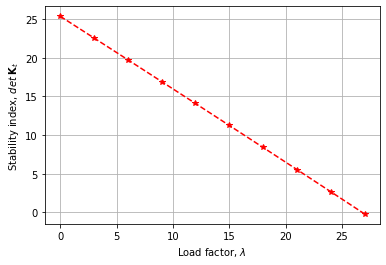

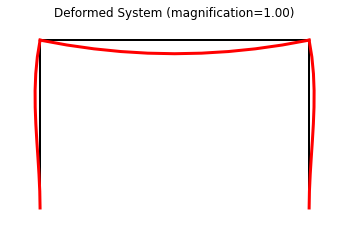

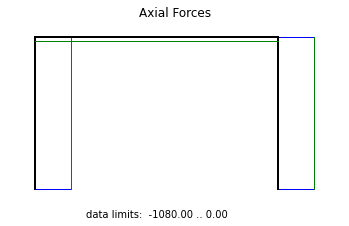

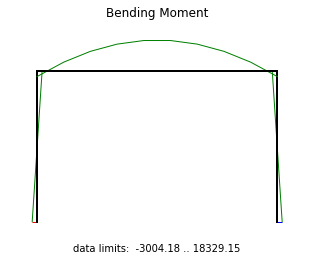

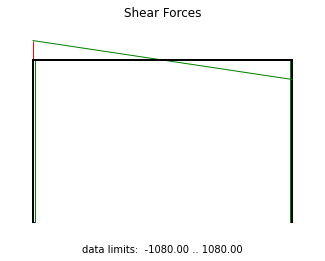

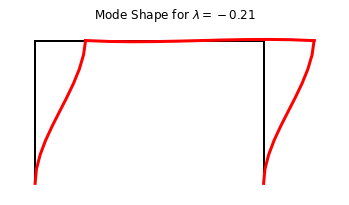

In [6]:
#
# ==== create some nice plots ===
#

plt.plot(lambdas,detKt,'--*r')
plt.grid(True)
plt.xlabel('Load factor, $ \lambda $')
plt.ylabel("Stability index, $ {det}\: {\\bf K}_t $")
plt.savefig("frame3_stability_check")
plt.show()

model.plot(factor=1.0, filename="frame3_deformed.png")

model.beamValuePlot("F", filename="frame3_force.png")
model.beamValuePlot("M", filename="frame3_moment.png")
model.beamValuePlot("V", filename="frame3_shear.png")

model.plotBucklingMode(factor=25., filename="frame3_buckling_mode0.png")
